## Fitting of multiple linear regression and its validation

### For VALIDATION we need to check the below mentioned properties
    - Linearity
    - Normality
    - Mullticolinearity
    - Auto Correlation
    - Homoscedasticity

In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
#***************************

# Load dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI-Linear-Regression/main/data/pie-sales.csv', 
                     index_col='week', sep=';')

print(df_pie.shape)
df_pie

(15, 3)


,pie_sales,price,advertising
week,,,
1,350,5.5,3.3
2,460,7.5,3.3
3,350,8.0,3.0
4,430,8.0,4.5
5,350,6.8,3.0
6,380,7.5,4.0
7,430,4.5,3.0
8,470,6.4,3.7
9,450,7.0,3.5


In [3]:
#Building regression model
# Set independent and dependent variables
X = df_pie[['price', 'advertising']]
y = df_pie['pie_sales']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 306.5261932837436
Coefficients: [-24.97508952  74.13095749]


In [11]:
# Values to predict
price = input('What is the price of the pie? \n')
advertising = input('How much money are you going to spend for advertising? \n')

try:
    print('We predict {:.0f} pies will be sold if we sold the pie at ${} and spend ${} at advertising.'.format(
        model.predict([[float(price), float(advertising)]])[0],
        price, 
        advertising))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

What is the price of the pie? 
5.5
How much money are you going to spend for advertising? 
4.5
We predict 503 pies will be sold if we sold the pie at $5.5 and spend $4.5 at advertising.


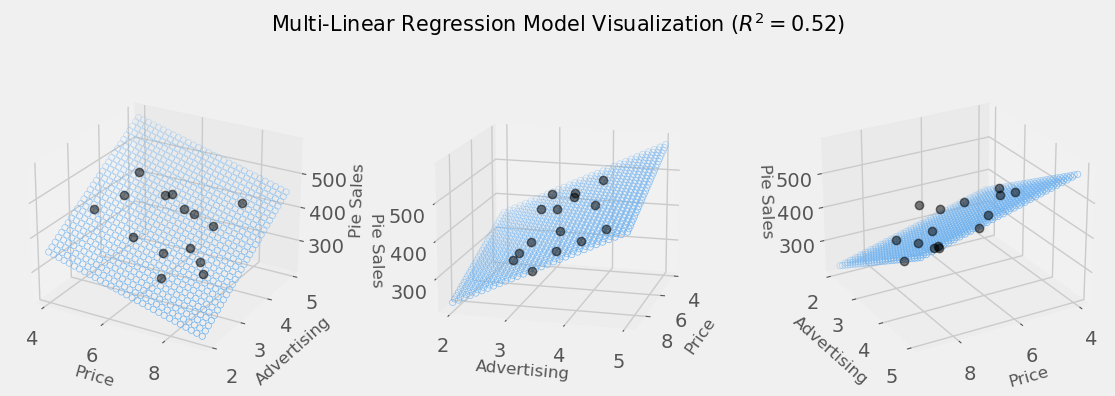

In [8]:
#3D Visualization
# Prepare data
X = df_pie[['price', 'advertising']].values.reshape(-1,2)
Y = df_pie['pie_sales']

# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

xx_pred = np.linspace(4, 9, 30)  # range of price values
yy_pred = np.linspace(2, 5, 30)  # range of advertising values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Predict using model built on previous step
# ols = linear_model.LinearRegression()
# model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)

# Plot model visualization
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Advertising', fontsize=12)
    ax.set_zlabel('Pie Sales', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

In [9]:
#Model Validation
X = df_pie[['price', 'advertising']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_pie['pie_sales'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 14 Mar 2024   Prob (F-statistic):             0.0120
Time:                        10:42:58   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

#### Model-
##### Pie_sales = 306.52 -24.97(Price) +74.131(Advertising)

-The pie sales model reveals that for every dollar increase in price, sales decrease by an average of 24.97 dollars. Conversely, investing one dollar in advertising leads to an average sales increase of 74.131 dollars. Furthermore, the intercept value of 306.52 indicates that when both price and advertising spend are zero, the average pie sales stand at 306.52 units

-Since the P-values for price and advertising is interpreted as 0.04 and 0.014 respectively which is less than 0.05,  therefore we can say that there is a statistically significant association between price, advertising and Pie_sales.

-R^2 value tells us about the 52.1% variation in the Pie Sales can be explained by by Price and advertising.

-Here, F statistics and corresponding p-values tell us the overall significance of the regression model that is whether explanatory variable in the model are useful for explaining the variation in response variable. Since p-value in the example is less the 0.05 therefore our model is statistically significant and price and advertising is deemed to usefull for explainig the variation in Pie Sales.

## Assumption Testing
Next, we will validate our model by doing residual analysis, below are the list of test or assumption we will do to check on our model validity:

-Linearity
-Normality
-Multicollinearity
-Autocorrelation
-Homoscedasticity

In [12]:
#Residual
df_pie['pie_sales_pred'] = olsmod.predict(X)
df_pie['residual'] = olsmod.resid
df_pie.head()

,pie_sales,price,advertising,pie_sales_pred,residual
week,,,,,
1,350,5.5,3.3,413.795361,-63.795361
2,460,7.5,3.3,363.845182,96.154818
3,350,8.0,3.0,329.118350,20.881650
4,430,8.0,4.5,440.314786,-10.314786
5,350,6.8,3.0,359.088457,-9.088457


### Linearity

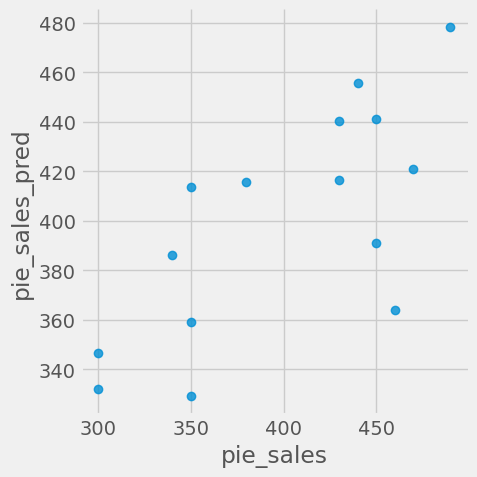

In [19]:
# Plotting the observed vs predicted values
sns.lmplot(x='pie_sales', y='pie_sales_pred', data=df_pie, fit_reg=False)

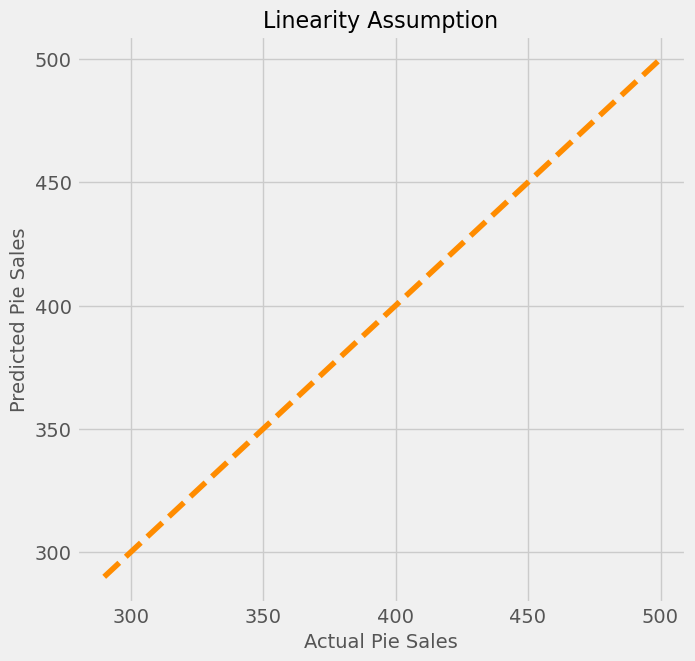

In [14]:
# Plotting the diagonal line
line_coords = np.arange(df_pie[['pie_sales', 'pie_sales_pred']].min().min()-10, 
                        df_pie[['pie_sales', 'pie_sales_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Pie Sales', fontsize=14)
plt.xlabel('Actual Pie Sales', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

### Normality

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.6655438857701557


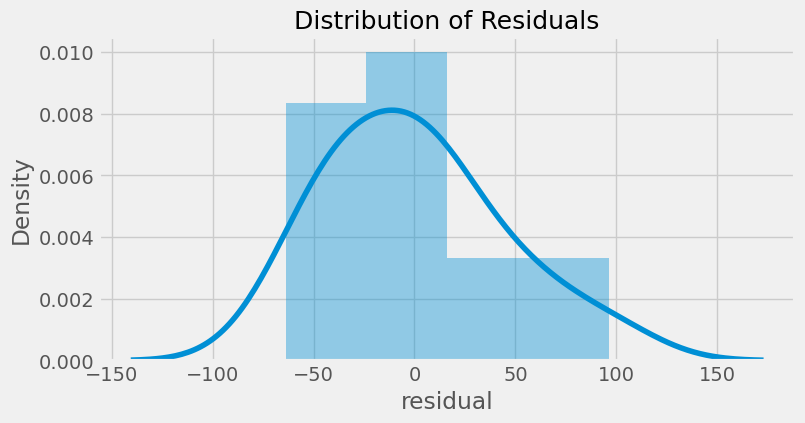

Residuals are normally distributed


In [15]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_pie['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df_pie['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')


### Multicolinearity

Pearson correlation coefficient matrix of each variables:
              pie_sales     price  advertising
pie_sales     1.000000 -0.443273     0.556320
price        -0.443273  1.000000     0.030438
advertising   0.556320  0.030438     1.000000


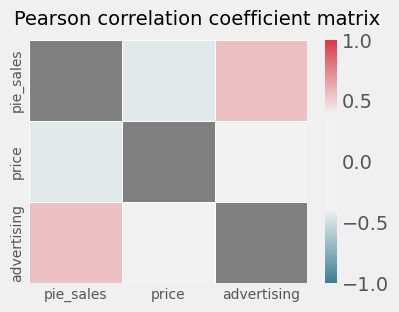

In [16]:
corr = df_pie[['pie_sales', 'price', 'advertising']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

### Autocorrelation

In [17]:

from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_pie['residual'])


print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.6831203020921248
Little to no autocorrelation 

Assumption satisfied


### Homoscedasticity

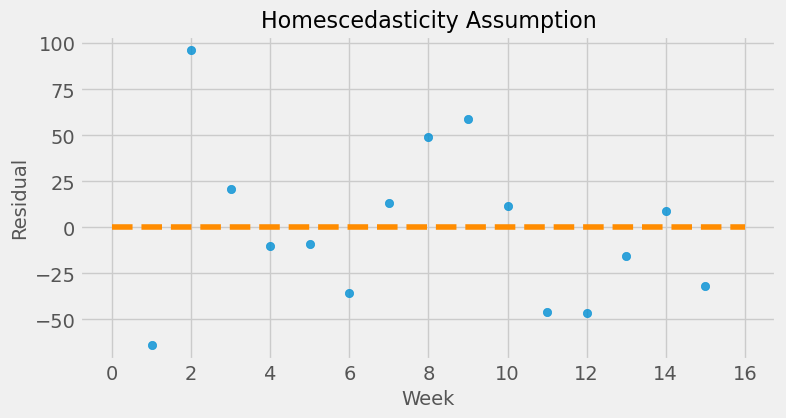

In [18]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_pie.index, y=df_pie.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_pie.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()